# crop_background

This code is used to remove the area of the image where there is no breast so that it deletes information that is not useful and all images are adjusted to the size of the breast.

In [124]:
import omidb
import cv2
import numpy as np
import os
import matplotlib.pyplot as plot

In [125]:
reading_path = 'images'
output_path = 'cropped_images'

get_normal_BBox makes a threshold of the image identifying the regions different from the background (0), defines each region with its mean, size, etc., takes the largest region (the one corresponding to the breast), defines the contour of this region and creates a roi that fits this region.

In [126]:
def get_normal_BBox(image):
    #threshold image
    img = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY)[1]  # ensure binary
    plot.imshow(img,'gray')#,vmin=0,vmax=255))
    plot.show()
    nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(img, connectivity=4)
    sizes = stats[:, -1]
    max_label = 1
    max_size = sizes[1]
    for i in range(2, nb_components):
        if sizes[i] > max_size:
            max_label = i
            max_size = sizes[i]
    img2 = np.zeros(output.shape,dtype=np.uint8)
    img2[output == max_label] = 255
    #plot.imshow(img2,'gray')
    #plot.show()
    #input("Press Enter to continue...")
    contours, hierarchy = cv2.findContours(img2,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

    cnt = contours[0]
    aux_im = img2
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(aux_im,(x,y),(x+w,y+h),(255,0,0),5)
#     plot.imshow(aux_im)
#     plot.show()
    #input("Press Enter to continue...")
    out_bbox = omidb.mark.BoundingBox(x, y, x+w, y+h)
    
    return out_bbox, img2 # returns bounding box and mask image.

crop_images makes a crop of the image with the roi defined with get_normal_BBox

In [127]:
def crop_images(image, i):
    bbox,mask = get_normal_BBox(image)
    print(bbox)
    aux_folder = output_path+"/"+ i
    image_crop = image[bbox.y1:bbox.y2,bbox.x1:bbox.x2]
    cv2.imwrite(aux_folder,image_crop)

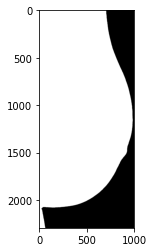

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=988, y2=2293)


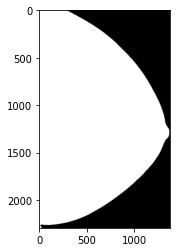

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1367, y2=2293)


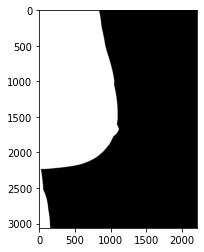

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1122, y2=3061)


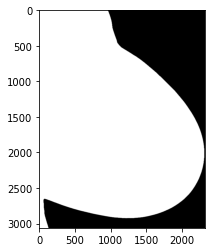

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=2316, y2=3061)


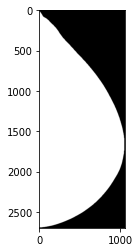

Press Enter to continue...
BoundingBox(x1=0, y1=9, x2=1053, y2=2691)


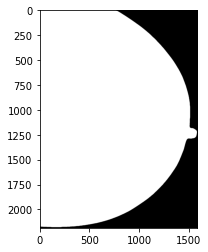

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1573, y2=2176)


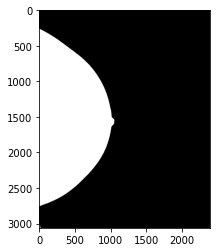

Press Enter to continue...
BoundingBox(x1=0, y1=261, x2=1054, y2=2756)


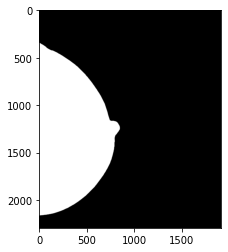

Press Enter to continue...
BoundingBox(x1=0, y1=345, x2=851, y2=2162)


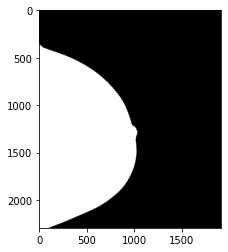

Press Enter to continue...
BoundingBox(x1=0, y1=358, x2=1035, y2=2293)


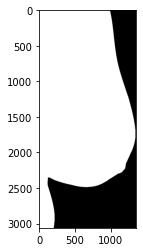

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1351, y2=3061)


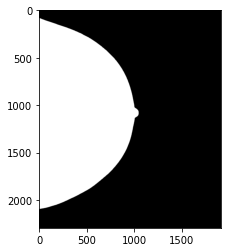

Press Enter to continue...
BoundingBox(x1=0, y1=84, x2=1049, y2=2094)


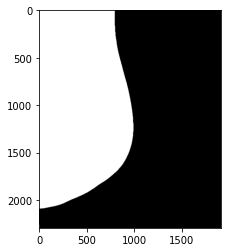

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=994, y2=2091)


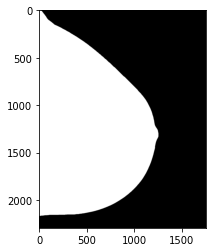

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1259, y2=2167)


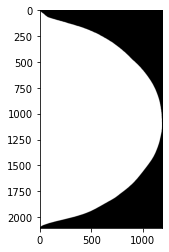

Press Enter to continue...
BoundingBox(x1=0, y1=10, x2=1178, y2=2098)


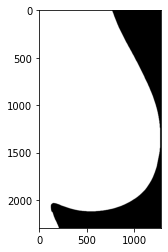

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1277, y2=2293)


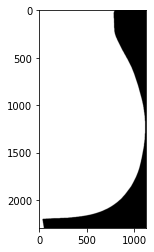

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1118, y2=2293)


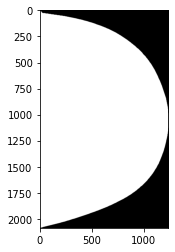

Press Enter to continue...
BoundingBox(x1=0, y1=4, x2=1233, y2=2085)


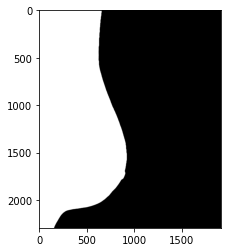

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=924, y2=2293)


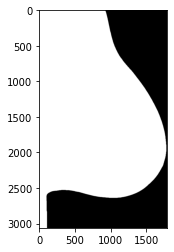

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1789, y2=3061)


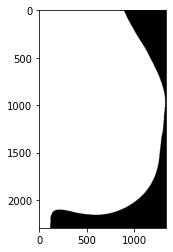

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1325, y2=2293)


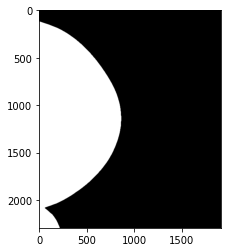

Press Enter to continue...
BoundingBox(x1=0, y1=121, x2=866, y2=2293)


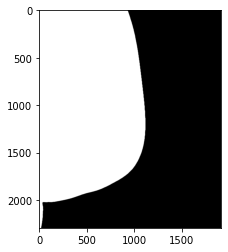

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1120, y2=2293)


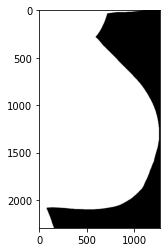

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1256, y2=2293)


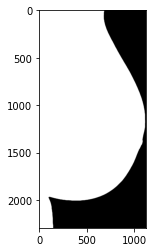

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1114, y2=2293)


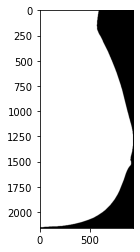

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=921, y2=2150)


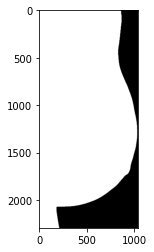

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1031, y2=2293)


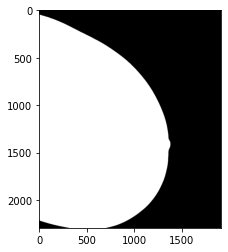

Press Enter to continue...
BoundingBox(x1=0, y1=46, x2=1382, y2=2293)


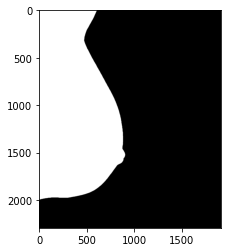

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=907, y2=1996)


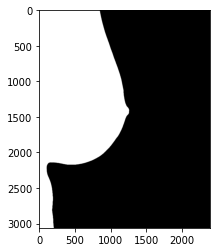

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1263, y2=3061)


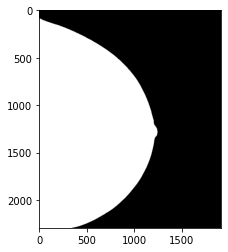

Press Enter to continue...
BoundingBox(x1=0, y1=86, x2=1247, y2=2293)


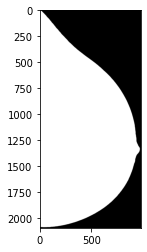

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=963, y2=2089)


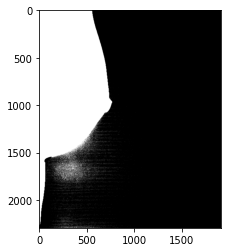

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=770, y2=2282)


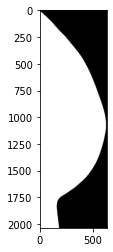

Press Enter to continue...
BoundingBox(x1=0, y1=10, x2=618, y2=2036)


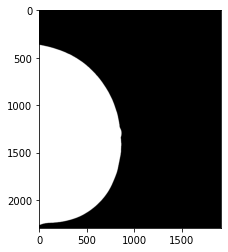

Press Enter to continue...
BoundingBox(x1=0, y1=365, x2=868, y2=2263)


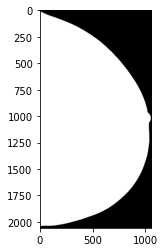

Press Enter to continue...
BoundingBox(x1=0, y1=11, x2=1044, y2=2045)


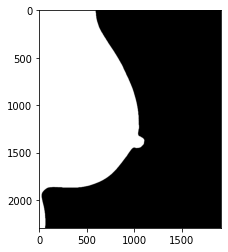

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1108, y2=2293)


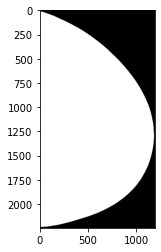

Press Enter to continue...
BoundingBox(x1=0, y1=11, x2=1177, y2=2235)


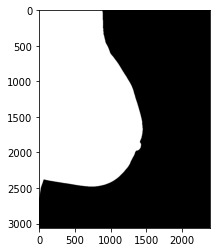

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1453, y2=2642)


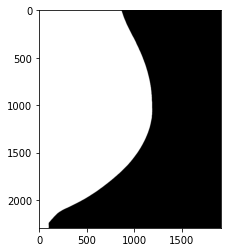

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1191, y2=2293)


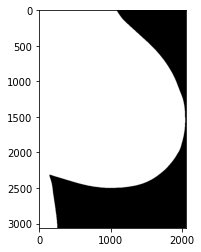

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=2057, y2=3061)


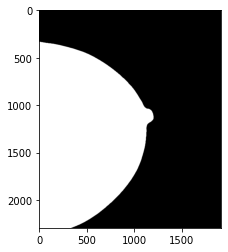

Press Enter to continue...
BoundingBox(x1=0, y1=334, x2=1205, y2=2293)


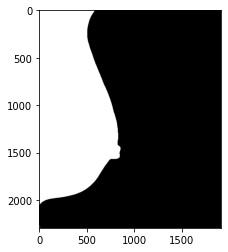

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=858, y2=2051)


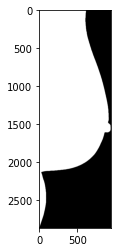

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=933, y2=2859)


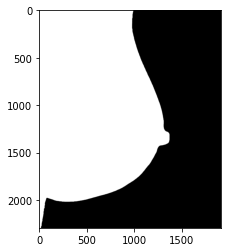

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1373, y2=2293)


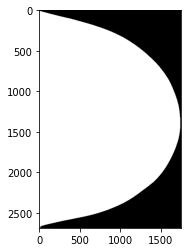

Press Enter to continue...
BoundingBox(x1=0, y1=9, x2=1733, y2=2685)


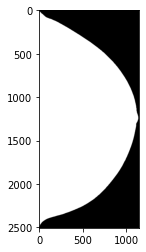

Press Enter to continue...
BoundingBox(x1=0, y1=10, x2=1135, y2=2498)


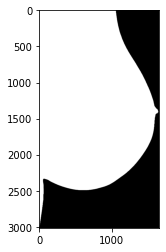

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1648, y2=3005)


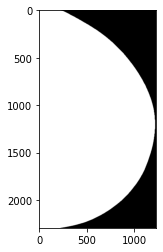

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1221, y2=2293)


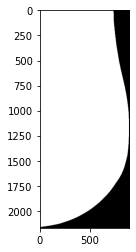

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=882, y2=2161)


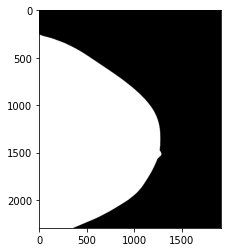

Press Enter to continue...
BoundingBox(x1=0, y1=251, x2=1287, y2=2293)


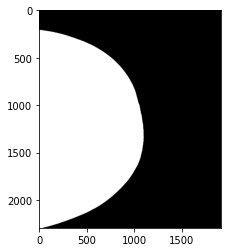

Press Enter to continue...
BoundingBox(x1=0, y1=210, x2=1102, y2=2293)


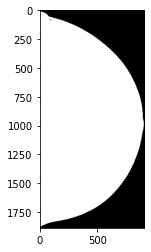

Press Enter to continue...
BoundingBox(x1=0, y1=11, x2=896, y2=1878)


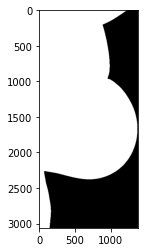

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1373, y2=3061)


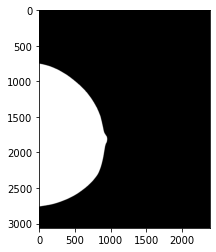

Press Enter to continue...
BoundingBox(x1=0, y1=752, x2=955, y2=2760)


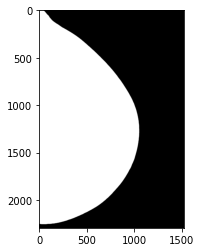

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1051, y2=2253)


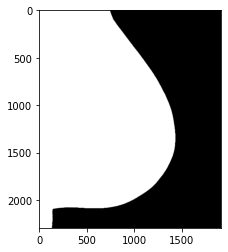

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1435, y2=2293)


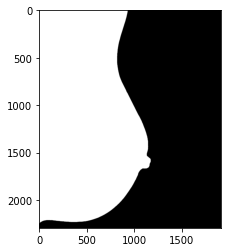

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1175, y2=2245)


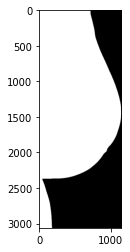

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1146, y2=3061)


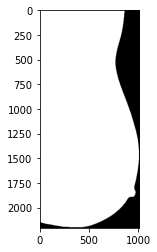

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1002, y2=2198)


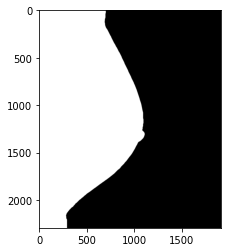

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1112, y2=2293)


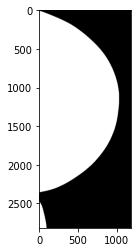

Press Enter to continue...
BoundingBox(x1=0, y1=9, x2=1035, y2=2359)


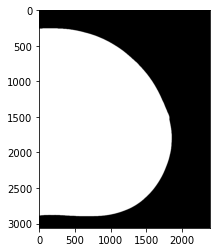

Press Enter to continue...
BoundingBox(x1=0, y1=257, x2=1859, y2=2895)


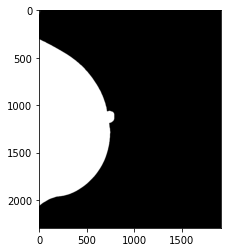

Press Enter to continue...
BoundingBox(x1=0, y1=306, x2=792, y2=2060)


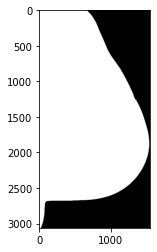

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1545, y2=3061)


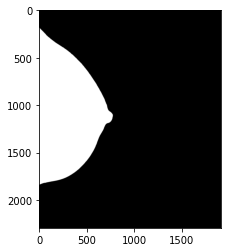

Press Enter to continue...
BoundingBox(x1=0, y1=185, x2=777, y2=1838)


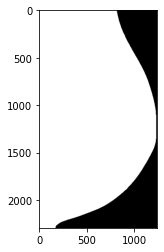

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1235, y2=2293)


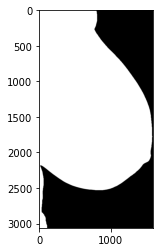

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1585, y2=3061)


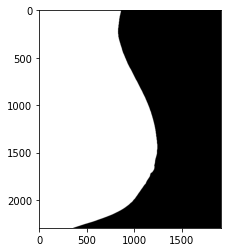

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1245, y2=2293)


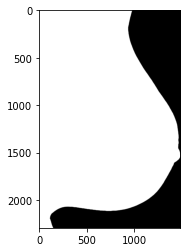

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1480, y2=2293)


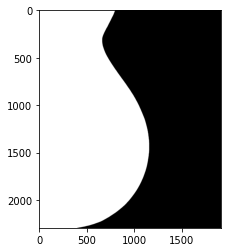

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1159, y2=2293)


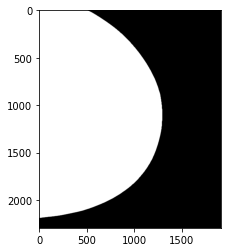

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1297, y2=2187)


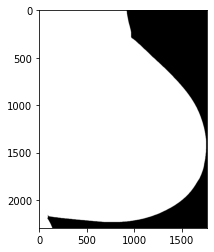

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1758, y2=2293)


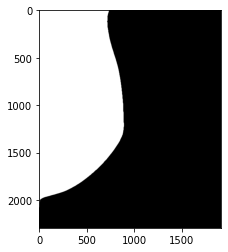

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=894, y2=2078)


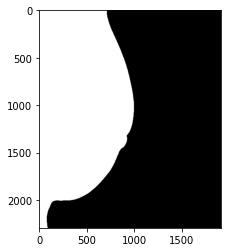

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=999, y2=2293)


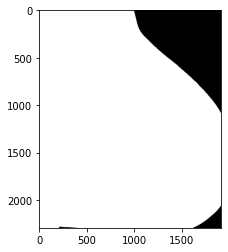

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1914, y2=2293)


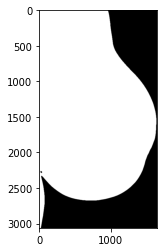

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1643, y2=3061)


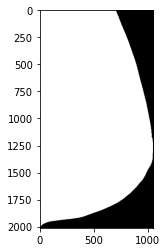

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1043, y2=2003)


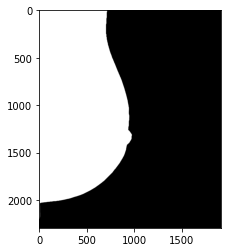

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=977, y2=2200)


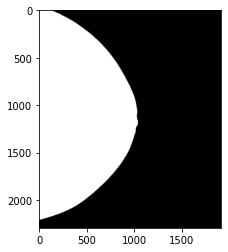

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1041, y2=2209)


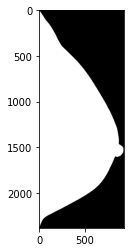

Press Enter to continue...
BoundingBox(x1=0, y1=5, x2=915, y2=2378)


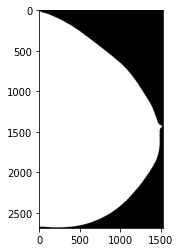

Press Enter to continue...
BoundingBox(x1=0, y1=11, x2=1518, y2=2677)


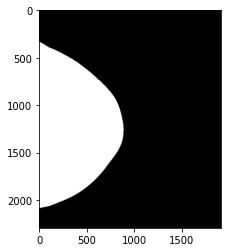

Press Enter to continue...
BoundingBox(x1=0, y1=334, x2=892, y2=2091)


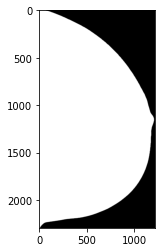

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1208, y2=2293)


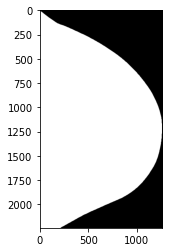

Press Enter to continue...
BoundingBox(x1=0, y1=9, x2=1257, y2=2241)


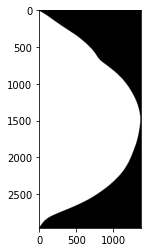

Press Enter to continue...
BoundingBox(x1=0, y1=9, x2=1374, y2=2952)


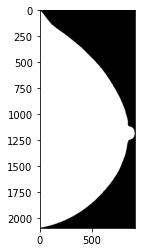

Press Enter to continue...
BoundingBox(x1=0, y1=3, x2=910, y2=2089)


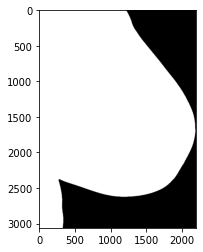

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=2198, y2=3061)


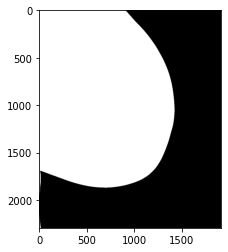

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1426, y2=1952)


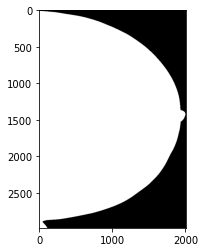

Press Enter to continue...
BoundingBox(x1=0, y1=10, x2=2006, y2=2981)


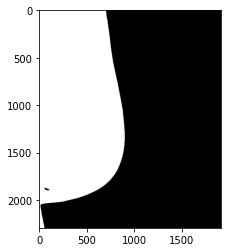

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=902, y2=2293)


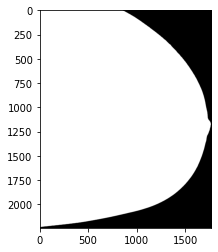

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1759, y2=2233)


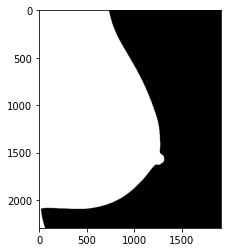

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1317, y2=2293)


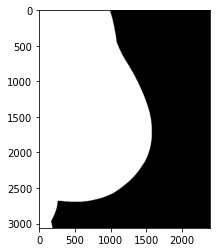

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1579, y2=3061)


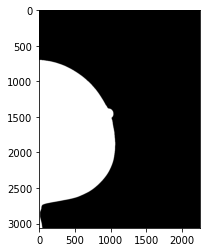

Press Enter to continue...
BoundingBox(x1=0, y1=701, x2=1070, y2=3061)


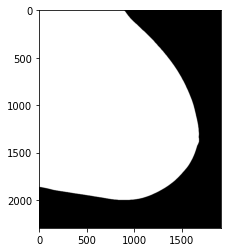

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1683, y2=1998)


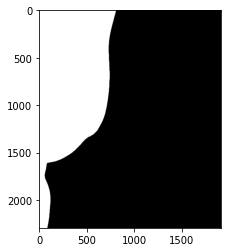

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=812, y2=2293)


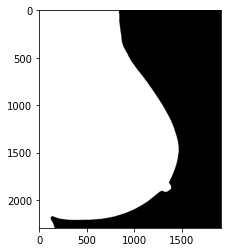

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1469, y2=2293)


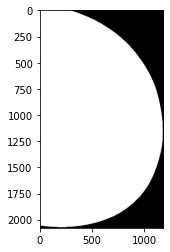

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1172, y2=2070)


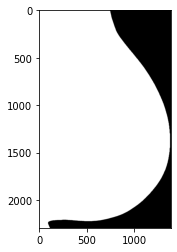

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1372, y2=2293)


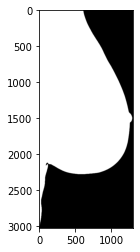

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1294, y2=3014)


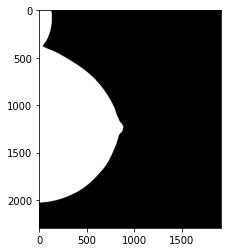

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=887, y2=2027)


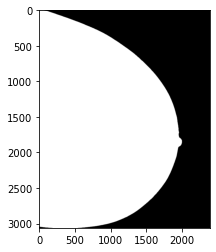

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=2002, y2=3061)


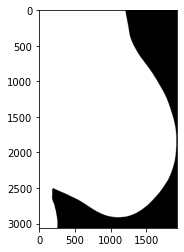

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1933, y2=3061)


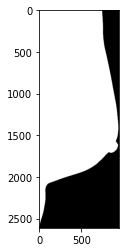

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=951, y2=2603)


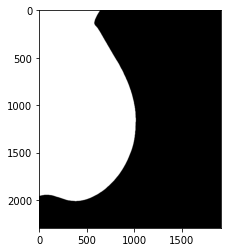

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1019, y2=2011)


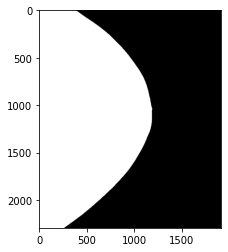

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1191, y2=2293)


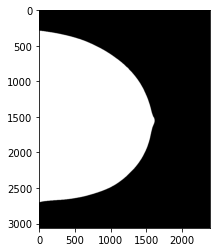

Press Enter to continue...
BoundingBox(x1=0, y1=288, x2=1619, y2=2700)


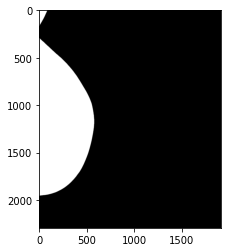

Press Enter to continue...
BoundingBox(x1=0, y1=294, x2=581, y2=1955)


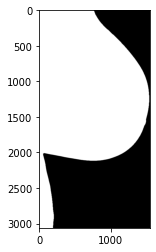

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1540, y2=3061)


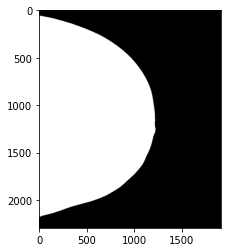

Press Enter to continue...
BoundingBox(x1=0, y1=58, x2=1226, y2=2179)


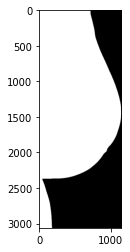

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1146, y2=3061)


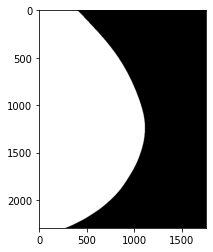

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1115, y2=2293)


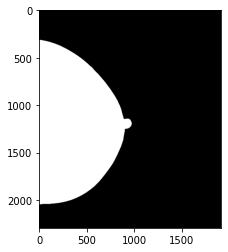

Press Enter to continue...
BoundingBox(x1=0, y1=313, x2=976, y2=2046)


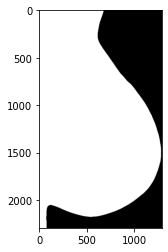

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1281, y2=2293)


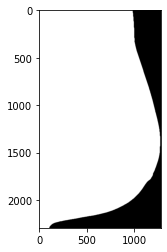

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1270, y2=2293)


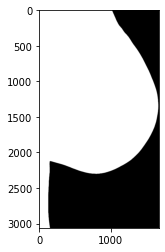

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1670, y2=3061)


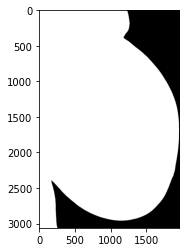

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1962, y2=3061)


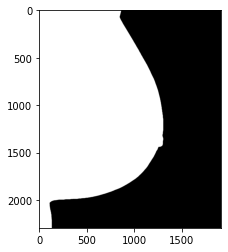

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1307, y2=2293)


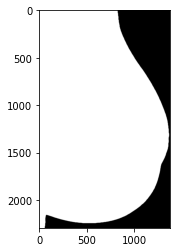

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1369, y2=2293)


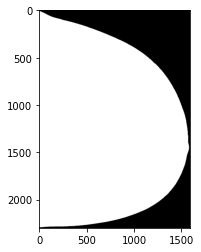

Press Enter to continue...
BoundingBox(x1=0, y1=10, x2=1576, y2=2291)


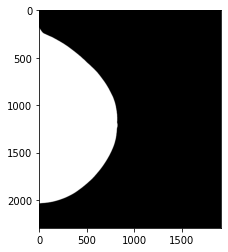

Press Enter to continue...
BoundingBox(x1=0, y1=183, x2=826, y2=2037)


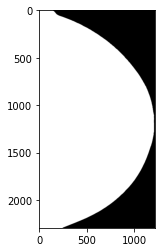

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1208, y2=2293)


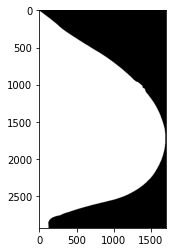

Press Enter to continue...
BoundingBox(x1=0, y1=8, x2=1697, y2=2929)


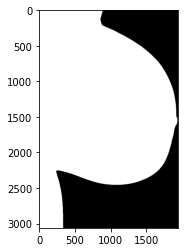

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1939, y2=3061)


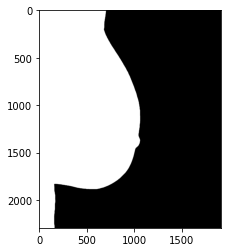

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1064, y2=2293)


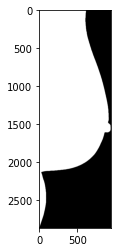

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=933, y2=2859)


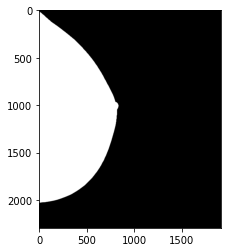

Press Enter to continue...
BoundingBox(x1=0, y1=14, x2=837, y2=2030)


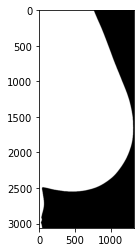

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1315, y2=3061)


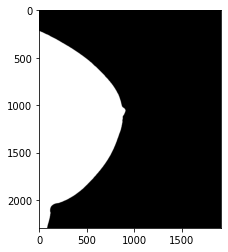

Press Enter to continue...
BoundingBox(x1=0, y1=220, x2=910, y2=2293)


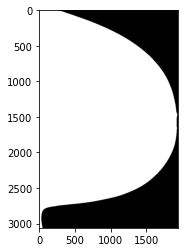

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1937, y2=3061)


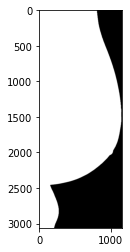

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1153, y2=3061)


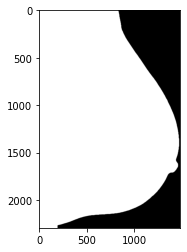

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1473, y2=2293)


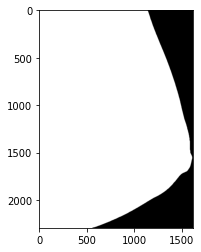

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1606, y2=2293)


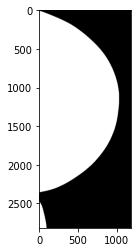

Press Enter to continue...
BoundingBox(x1=0, y1=9, x2=1035, y2=2359)


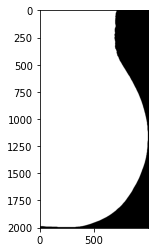

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=989, y2=1993)


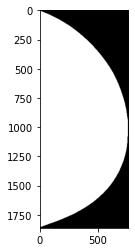

Press Enter to continue...
BoundingBox(x1=0, y1=8, x2=749, y2=1854)


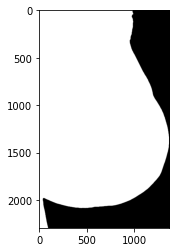

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1363, y2=2293)


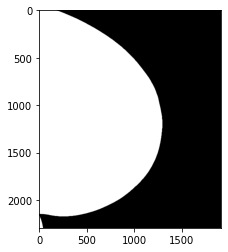

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1298, y2=2171)


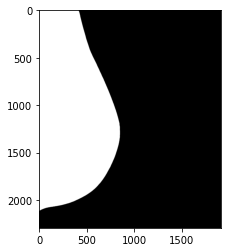

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=852, y2=2114)


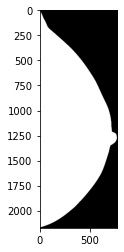

Press Enter to continue...
BoundingBox(x1=0, y1=11, x2=765, y2=2165)


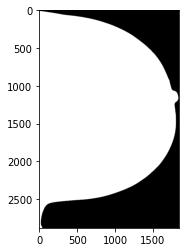

Press Enter to continue...
BoundingBox(x1=0, y1=10, x2=1843, y2=2881)


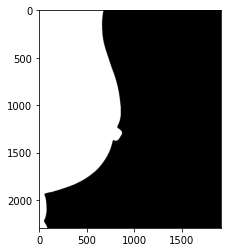

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=873, y2=2293)


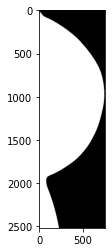

Press Enter to continue...
BoundingBox(x1=0, y1=10, x2=751, y2=2519)


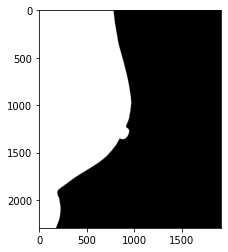

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=971, y2=2293)


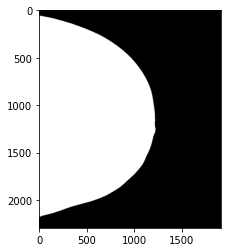

Press Enter to continue...
BoundingBox(x1=0, y1=58, x2=1226, y2=2179)


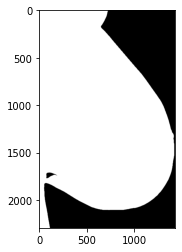

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1423, y2=2293)


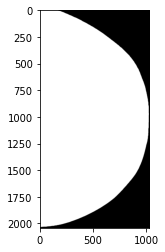

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1016, y2=2034)


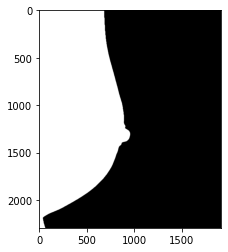

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=959, y2=2293)


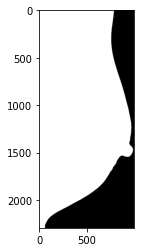

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=986, y2=2293)


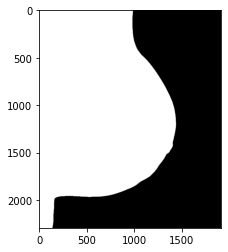

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1442, y2=2293)


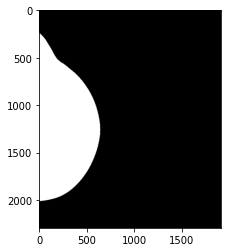

Press Enter to continue...
BoundingBox(x1=0, y1=237, x2=644, y2=2011)


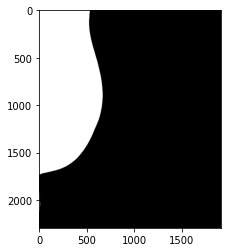

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=670, y2=1735)


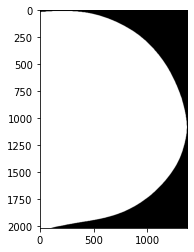

Press Enter to continue...
BoundingBox(x1=0, y1=8, x2=1363, y2=2017)


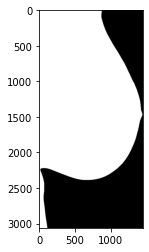

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1446, y2=3061)


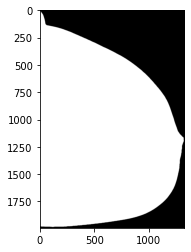

Press Enter to continue...
BoundingBox(x1=0, y1=10, x2=1312, y2=1983)


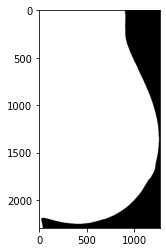

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1256, y2=2293)


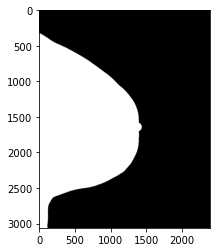

Press Enter to continue...
BoundingBox(x1=0, y1=320, x2=1439, y2=3061)


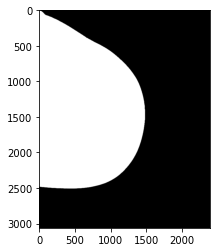

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1485, y2=2507)


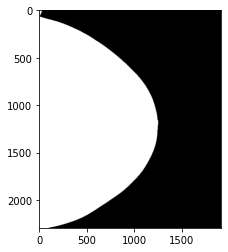

Press Enter to continue...
BoundingBox(x1=0, y1=0, x2=1254, y2=2293)


In [128]:
contenido = os.listdir(reading_path)
for i in os.listdir(reading_path):
    img = cv2.imread(reading_path + '/' + i, cv2.IMREAD_GRAYSCALE)
    image = np.uint8(img)
    crop_images(image, i)